___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. 
 
____
I will use big banks stock price and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to 2018.



 

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*
### Import functions

In [106]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Obtain the Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo
 
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)




In [83]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2018,12,31)

In [84]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)
df.head()

Attributes       High                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  47.180000  493.799988  129.440002  40.360001  58.490002   
2006-01-04  47.240002  491.000000  128.910004  40.139999  59.279999   
2006-01-05  46.830002  487.799988  127.320000  39.810001  58.590000   
2006-01-06  46.910000  489.000000  129.250000  40.240002  58.849998   
2006-01-09  46.970001  487.399994  130.619995  40.720001  59.290001   

Attributes                   Low                                     \
Symbols           WFC        BAC           C          GS        JPM   
Date                                                                  
2006-01-03  31.975000  46.150002  481.100006  124.230003  39.299999   
2006-01-04  31.820000  46.450001  483.500000  126.379997  39.419998   
2006-01-05  31.555000  46.320000  484.000000  125.610001  39.500000   
2006-01-06  31.775000  46.349998  482.000000  127.290001  39.549999   
2006-01-09  31.825001  46.360001  483.000000  128.000000  39.880001   

Attributes    ...         Volume                                     \
Symbols       ...             GS         JPM         MS         WFC   
Date          ...                                                     
2006-01-03    ...      6188700.0  12838600.0  5377000.0  11016400.0   
2006-01-04    ...      4861600.0  13491500.0  7977800.0  10870000.0   
2006-01-05    ...      3717400.0   8109400.0  5778000.0  10158000.0   
2006-01-06    ...      4319600.0   7966900.0  6889800.0   8403800.0   
2006-01-09    ...      4723500.0  16575200.0  4144500.0   5619600.0   

Attributes  Adj Close                                                           
Symbols           BAC           C          GS        JPM         MS        WFC  
Date                                                                            
2006-01-03  35.953278  400.636993  109.526077  28.418390  38.591286  21.485973  
2006-01-04  35.571438  393.240295  108.013260  28.254372  38.617764  21.236753  
2006-01-05  35.617275  395.191223  107.970749  28.339947  38.723652  21.213186  
2006-01-06  35.563797  395.191223  109.500565  28.539614  38.763355  21.337786  
2006-01-09  35.586720  393.321686  110.817924  29.003166  39.173679  21.334421  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [85]:
df.columns.names = ['Stock Info','Bank Ticker']
df.head()

Stock Info        High                                                \
Bank Ticker        BAC           C          GS        JPM         MS   
Date                                                                   
2006-01-03   47.180000  493.799988  129.440002  40.360001  58.490002   
2006-01-04   47.240002  491.000000  128.910004  40.139999  59.279999   
2006-01-05   46.830002  487.799988  127.320000  39.810001  58.590000   
2006-01-06   46.910000  489.000000  129.250000  40.240002  58.849998   
2006-01-09   46.970001  487.399994  130.619995  40.720001  59.290001   

Stock Info                    Low                                     \
Bank Ticker        WFC        BAC           C          GS        JPM   
Date                                                                   
2006-01-03   31.975000  46.150002  481.100006  124.230003  39.299999   
2006-01-04   31.820000  46.450001  483.500000  126.379997  39.419998   
2006-01-05   31.555000  46.320000  484.000000  125.610001  39.500000   
2006-01-06   31.775000  46.349998  482.000000  127.290001  39.549999   
2006-01-09   31.825001  46.360001  483.000000  128.000000  39.880001   

Stock Info     ...         Volume                                     \
Bank Ticker    ...             GS         JPM         MS         WFC   
Date           ...                                                     
2006-01-03     ...      6188700.0  12838600.0  5377000.0  11016400.0   
2006-01-04     ...      4861600.0  13491500.0  7977800.0  10870000.0   
2006-01-05     ...      3717400.0   8109400.0  5778000.0  10158000.0   
2006-01-06     ...      4319600.0   7966900.0  6889800.0   8403800.0   
2006-01-09     ...      4723500.0  16575200.0  4144500.0   5619600.0   

Stock Info   Adj Close                                                \
Bank Ticker        BAC           C          GS        JPM         MS   
Date                                                                   
2006-01-03   35.953278  400.636993  109.526077  28.418390  38.591286   
2006-01-04   35.571438  393.240295  108.013260  28.254372  38.617764   
2006-01-05   35.617275  395.191223  107.970749  28.339947  38.723652   
2006-01-06   35.563797  395.191223  109.500565  28.539614  38.763355   
2006-01-09   35.586720  393.321686  110.817924  29.003166  39.173679   

Stock Info              
Bank Ticker        WFC  
Date                    
2006-01-03   21.485973  
2006-01-04   21.236753  
2006-01-05   21.213186  
2006-01-06   21.337786  
2006-01-09   21.334421  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

### Method 1: Use xs function

In [86]:
df.xs(key ='Close', level='Stock Info', axis=1).max() # key is the value we want, level is the row we are looking for, 
                                                        #axis=1 because we want all each bank's close price is in each column

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

### Method 2: direct refering to the dataframe

In [87]:
df.Close.max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

### Since the original dateset doen't show the returns, I would like to create a table to calcualte the returns for each stock use pct_chage() method.

In [88]:
returns=df['Close'].pct_change()
returns.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe.

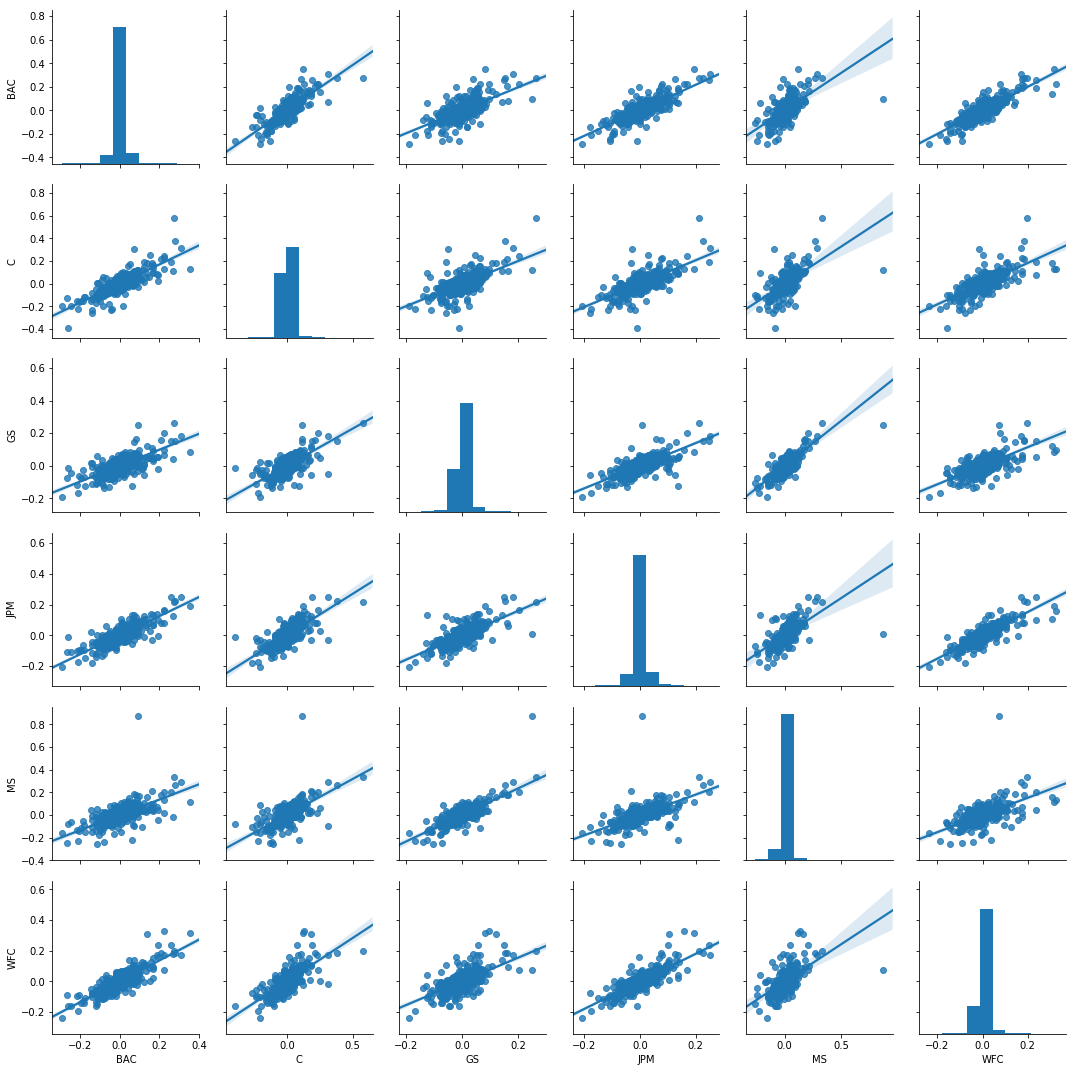

In [89]:
sns.pairplot(returns[1:],dropna=True, kind='reg')

### Find out what's the best and worst single day of return for each bank.  

In [90]:
returns.idxmax()

Bank Ticker
BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [91]:
returns.idxmin()

Bank Ticker
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

### How many days apart between the stock best and worst return day?

In [82]:
abs(returns.idxmax()-returns.idxmin())

Bank Ticker
BAC    79 days
C      95 days
GS     57 days
JPM     1 days
MS      4 days
WFC   188 days
dtype: timedelta64[ns]

#### Conclusion: From above calcuation, we found the best and worst day of JPM and MS stock are extremly short, especially for JPM, it is 1 day apart.

### Calcuate the Standard deviation for each stock over the time.

In [92]:
returns.std()

Bank Ticker
BAC    0.033128
C      0.034764
GS     0.023453
JPM    0.025108
MS     0.034189
WFC    0.027339
dtype: float64

#### Conclusion: CITI Group have the highest standard deviation, thus, this stock price is most volatile

### Calcuate the Standard deviation for each stock in 2018.

In [98]:
returns['2018-01-01':'2018-12-31'].std()

Bank Ticker
BAC    0.015616
C      0.015093
GS     0.016175
JPM    0.013879
MS     0.017187
WFC    0.014804
dtype: float64

#### Conclusion: Compare to 2008, all the stocks are more stable in 2018. Morgan Stanley stock price is most volatile. 

### Create a distplot using seaborn of the 2018 returns for Morgan Stanley **

C:\Users\sha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'2018 MS stock returns')

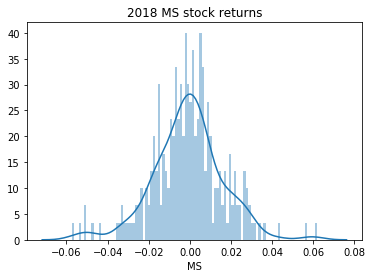

In [107]:
sns.distplot(returns['2018-01-01':'2018-12-31']['MS'],bins=100)
plt.title("2018 MS stock returns")

** Create a distplot using seaborn of the 2008 returns for MS **

C:\Users\sha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


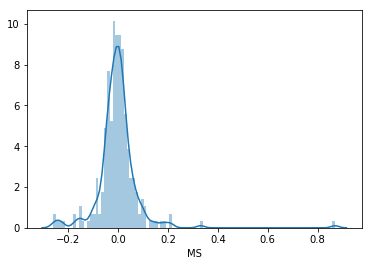

In [110]:
sns.distplot(returns['2008-01-01':'2008-12-31']['MS'],bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



** Create a line plot showing Close price for each bank for the entire index of time. **

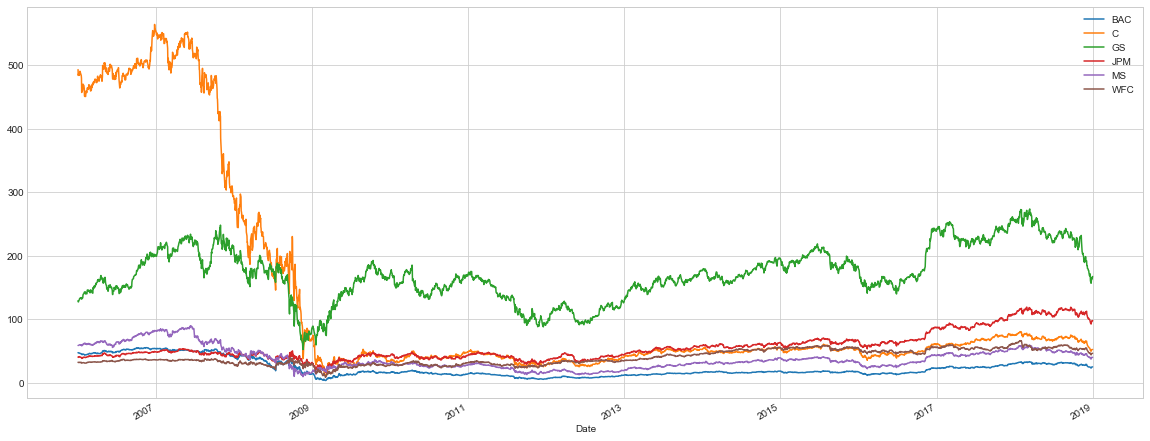

In [121]:
df.Close.plot(figsize=(20,8))
plt.legend()

#### Conclusion: Citi Group stock price was significiant decreased in 2008. Since 2009, all stock prices are quite stable except for Goldman Sachs, which had some ups and downs from 2009 till 2018.

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Morgan Stanley's stock for the year 2008**

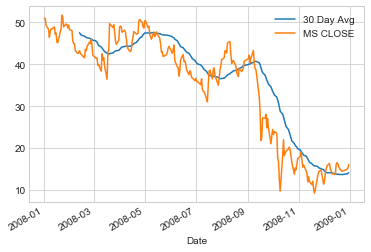

In [136]:
MS['2008-01-01':'2008-12-31'].Close.rolling(window=30).mean().plot(label='30 Day Avg') # rolling 30 days average
MS['2008-01-01':'2008-12-31'].Close.plot(label='MS CLOSE') # 2018 close price
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

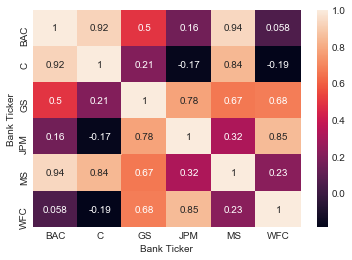

In [141]:
sns.heatmap(df.Close.corr(),annot=True)

#### Conclusion: From the above correlation heatmap, we can tell that Citi Group stock price has positive correlation with Bank of America and Morgan Stanley. Wells Fargo stock price has nearly no correlation to Bank Of America. Citi Group, Wells Fargo and JPM have slightly inverse correlation.
    

**  Use seaborn's clustermap to cluster the correlations together:**

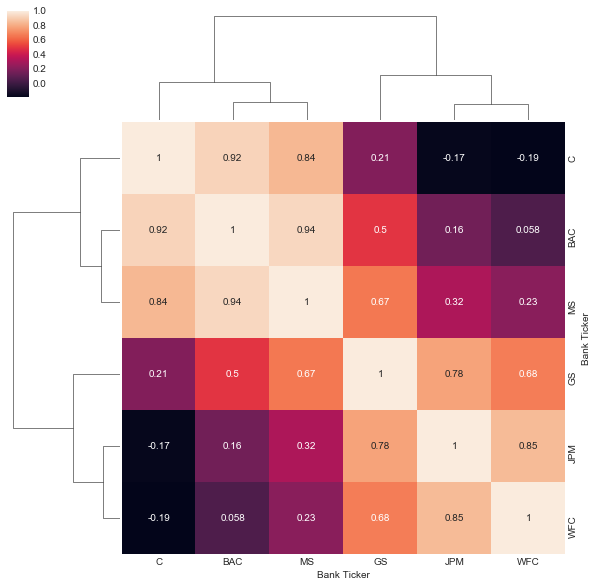

In [142]:
sns.clustermap(df.Close.corr(),annot=True)